# Задача N тел

- **a)**
    

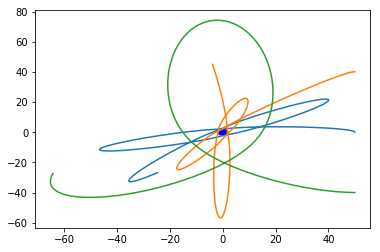

In [3]:
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 50.0  # гравитационная постоянная
collision_distance = 3.0  # всё-таки это не точки
model_delta_t = 0.01
time_to_model = 2.5

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        # Аннотации типов по желанию, но могут помочь IDE и компилятору, когда таковые имеются
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist ** 2
        else:
            return -G / dist ** 3 # будем считать, что отскакивают точки друг от друга резко, но стараться не допускать этого
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  # Евклидова норма (по теореме Пифагора)
        force_direction = delta_p / distance
        force = force_direction * self.mass * other.mass * self.gravity_dencity(distance)
        return force
    
    def advance(self):
        # print(self.position)
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        # print(force)
        self.velocity += force * model_delta_t / self.mass

class MaterialPoint2D(MaterialPoint):
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        MaterialPoint.__init__(self,mass,position,velocity)
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist
        else:
            return -G / dist ** 3
    
centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
points=[MaterialPoint2D(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0])),MaterialPoint2D(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0])),MaterialPoint2D(10.0, numpy.array([50.0, -40.0]), numpy.array([-100.0, 0.0]))]

def model_step():
    for point in points:
        point.apply_force(point.force_induced_by_other(centrum))
    
    for point in points:
        point.advance()

trajectories=dict.fromkeys(points)
for point in trajectories.keys():
    trajectories[point]=([],[])

for stepn in range(int(time_to_model / model_delta_t)):
    for point in trajectories.keys():
        xs_i,ys_i=trajectories[point]
        xs_i.append(point.position[0])
        ys_i.append(point.position[1])
    model_step()

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)

for point in points:
    xs_i,ys_i=trajectories[point]
    plt.plot(xs_i,ys_i)

plt.show()


- **b)**

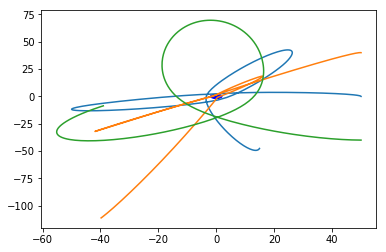

In [4]:
del points
points=[MaterialPoint2D(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0])),MaterialPoint2D(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0])),MaterialPoint2D(10.0, numpy.array([50.0, -40.0]), numpy.array([-100.0, 0.0]))]

def model_step():
    for point in points:
        force=point.force_induced_by_other(centrum)
        for point1 in points:
            if not(point1==point):
                force+=point.force_induced_by_other(point1)
        point.apply_force(force)
    
    for point in points:
        point.advance()

trajectories=dict.fromkeys(points)
for point in trajectories.keys():
    trajectories[point]=([],[])

for stepn in range(int(time_to_model / model_delta_t)):
    for point in trajectories.keys():
        xs_i,ys_i=trajectories[point]
        xs_i.append(point.position[0])
        ys_i.append(point.position[1])
    model_step()

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)

for point in points:
    xs_i,ys_i=trajectories[point]
    plt.plot(xs_i,ys_i)

plt.show()